Explaratory Data Analysis

In [36]:
import os

folder_path = "Categorize-Arabic-News-Data/Categorize-Arabic-News-Data/data/data"
if os.path.exists(folder_path):
    contents = os.listdir(folder_path)
    print("Contents inside the folder:")
    for item in contents:
        print(item)


Contents inside the folder:
.ipynb_checkpoints
culture
economy
politics
science


In [37]:
print("Classes names:\n",contents)

Classes names:
 ['.ipynb_checkpoints', 'culture', 'economy', 'politics', 'science']


In [38]:
categories = [c for c in contents if c != ".ipynb_checkpoints"]
data = []

In [39]:
for category in categories:
    folder = os.path.join(folder_path, category)
    files = glob.glob(f"{folder}/*.txt")

    print(f"📂 {category}: {len(files)} files found")

    for file in files:
        with open(file, "r", encoding="utf-8") as f:
            text = f.read()
        data.append({"category": category, "text": text})

📂 culture: 674 files found
📂 economy: 662 files found
📂 politics: 674 files found
📂 science: 614 files found


In [40]:
df = pd.DataFrame(data)

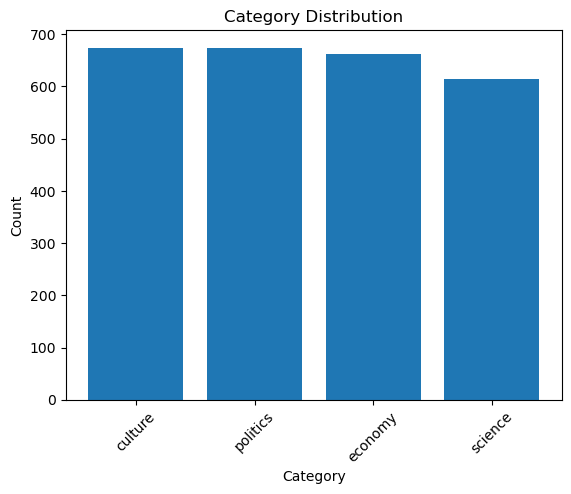

In [41]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each category
category_counts = df['category'].value_counts()

# Create a bar chart
plt.bar(category_counts.index, category_counts.values)

# Set the plot title and labels
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

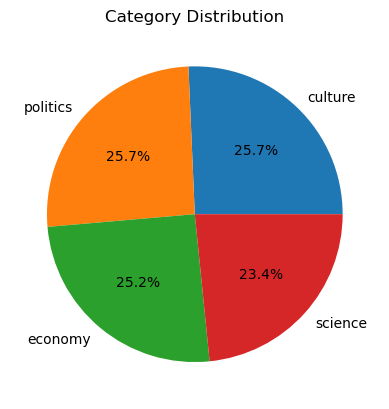

In [42]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each category
category_counts = df['category'].value_counts()

# Create a pie chart
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')

# Set the plot title
plt.title('Category Distribution')

# Display the plot
plt.show()

In [43]:
df['category'].value_counts()


culture     674
politics    674
economy     662
science     614
Name: category, dtype: int64

In [44]:
import pandas as pd

# Convert the list to a DataFrame
data_df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
data_df.to_csv('file1.csv', index=False)

In [45]:
# Convert the list to a DataFrame
data_df = pd.DataFrame(data)

# Check for null values
null_counts = data_df.isnull().sum()

# Print the null value counts
print(null_counts)

category    0
text        0
dtype: int64


Text Preprocessing for Machine Learning

In [46]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download stop words and the WordNet lemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the stop words
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove special characters
    text = re.sub(r'\W', ' ', text)

    # Transform text to lower case
    text = text.lower()

    # Remove single characters
    text = re.sub(r'\s+[a-z]\s+', ' ', text)

    # Substitute multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)

    # Remove stop words and lemmatize the words
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]

    # Join the words back into a single string
    text = ' '.join(text)

    return text

# Apply the cleaning function to the 'text' column in the DataFrame
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the original and cleaned text for the first 5 rows
print(df[['text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...


                                                text  \
0  بنسعيد يتفقد موقع معرض الكتاب \n\n قام وزير ال...   
1  ‪أفاية ينبش الوجود في السينما والفلسفة‬ \n\n ص...   
2  سلارت تعرض "الملح المسوس" بالقاعات‬ \n\n تقدم ...   
3  نجوم "سيمبسون" يكرَّمون في مكناس \n\n على إيقا...   
4  ضبابية تكاليف الإنتاجات الرمضانية تدفع مهنيين ...   

                                        cleaned_text  
0  بنسعيد يتفقد موقع معرض الكتاب قام وزير الشباب ...  
1  أفاية ينبش الوجود في السينما والفلسفة صدر حديث...  
2  سلارت تعرض الملح المسوس بالقاعات تقدم فرقة سلا...  
3  نجوم سيمبسون يكر مون في مكناس على إيقاع الاحتف...  
4  ضبابية تكاليف الإنتاجات الرمضانية تدفع مهنيين ...  


In [47]:
df

,category,text,cleaned_text
0,culture,بنسعيد يتفقد موقع معرض الكتاب \n\n قام وزير ال...,بنسعيد يتفقد موقع معرض الكتاب قام وزير الشباب ...
1,culture,‪أفاية ينبش الوجود في السينما والفلسفة‬ \n\n ص...,أفاية ينبش الوجود في السينما والفلسفة صدر حديث...
2,culture,"سلارت تعرض ""الملح المسوس"" بالقاعات‬ \n\n تقدم ...",سلارت تعرض الملح المسوس بالقاعات تقدم فرقة سلا...
3,culture,"نجوم ""سيمبسون"" يكرَّمون في مكناس \n\n على إيقا...",نجوم سيمبسون يكر مون في مكناس على إيقاع الاحتف...
4,culture,ضبابية تكاليف الإنتاجات الرمضانية تدفع مهنيين ...,ضبابية تكاليف الإنتاجات الرمضانية تدفع مهنيين ...
...,...,...,...
2619,science,بعد الحرب الروسية على أوكرانيا.. كيف تكون حروب...,بعد الحرب الروسية على أوكرانيا كيف تكون حروب ا...
2620,science,5 ابتكارات تحدث ثورة في عالم السيارات \n\n سيؤ...,5 ابتكارات تحدث ثورة في عالم السيارات سيؤدي تع...
2621,science,واتساب تستعد لطرح ميزة تصويت تغير طريقة المحاد...,واتساب تستعد لطرح ميزة تصويت تغير طريقة المحاد...
2622,science,يستخدم تكنولوجيا متقدمة.. 5 حقائق لا تعرفها عن...,يستخدم تكنولوجيا متقدمة 5 حقائق لا تعرفها عن ص...


Supervised Models

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['category'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize the models
logistic_regression_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
svc_model = SVC()

# Train and evaluate the Logistic Regression model
logistic_regression_model.fit(X_train_vec, y_train)
y_pred_lr = logistic_regression_model.predict(X_test_vec)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# Train and evaluate the Random Forest Classifier model
random_forest_model.fit(X_train_vec, y_train)
y_pred_rf = random_forest_model.predict(X_test_vec)
print("Random Forest Classifier:\n", classification_report(y_test, y_pred_rf))

# Train and evaluate the Support Vector Classifier model
svc_model.fit(X_train_vec, y_train)
y_pred_svc = svc_model.predict(X_test_vec)
print("Support Vector Classifier:\n", classification_report(y_test, y_pred_svc))

# Now to predict on new data
new_data = ["العملات الرقمية تؤثر على اقتصاد الدولة "]  # replace with your actual new data

# Vectorize the new data in the same way as your training and testing data
new_data_vec = vectorizer.transform(new_data)

# Use the trained SVC model to make predictions
predictions = svc_model.predict(new_data_vec)

print("Predictions on new data:", predictions)

Logistic Regression:
               precision    recall  f1-score   support

     culture       0.92      0.98      0.95       138
     economy       0.94      0.92      0.93       127
    politics       0.94      0.90      0.92       136
     science       0.98      0.98      0.98       124

    accuracy                           0.94       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.94      0.94      0.94       525

Random Forest Classifier:
               precision    recall  f1-score   support

     culture       0.90      0.96      0.93       138
     economy       0.92      0.86      0.89       127
    politics       0.90      0.90      0.90       136
     science       0.97      0.97      0.97       124

    accuracy                           0.92       525
   macro avg       0.92      0.92      0.92       525
weighted avg       0.92      0.92      0.92       525

Support Vector Classifier:
               precision    recall  f1-score   support

In [49]:
from sklearn.metrics import accuracy_score

# Dictionary to hold model names and their accuracies
model_accuracies = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Random Forest Classifier': accuracy_score(y_test, y_pred_rf),
    'Support Vector Classifier': accuracy_score(y_test, y_pred_svc),
}

# Find the model with the highest accuracy
best_model = max(model_accuracies, key=model_accuracies.get)

print(f'The best model is {best_model} with an accuracy of {model_accuracies[best_model]}')

The best model is Support Vector Classifier with an accuracy of 0.9504761904761905
